In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from netCDF4 import Dataset
#import h5py
import os

In [4]:
from pyproj import Proj, transform
os.environ['PROJ_LIB'] = r'C:\Anaconda3\pkgs\proj4-4.9.3-vc14_5\Library\share'

In [5]:
#os.chdir('F:/Codigo/Python')
os.chdir('C:/Users/jcr693/OneDrive - Universidad de Cantabria/Codigo/Python/')
%run read_write.py

ERROR:root:File `'read_write.py'` not found.


In [6]:
# import pymodis

#### DEM de la cuenca (ETRS89-UTM30N)

In [23]:
rutaTETIS = 'F:/Proyectos/GESDIVAH/SDM/TETIS/PdE/Actual/'


In [174]:
# mdt de la cuenca del Deva hasta la estación de aforo 1265
read_ascii(rutaTETIS + 'dem.asc')
dem = read_ascii.data[::-1]
atrDEM = read_ascii.attributes

Xo = atrDEM[2]
Xf = atrDEM[2] + atrDEM[0] * atrDEM[4]
Xo += atrDEM[4] / 2
Xf += atrDEM[4] / 2
XX = np.arange(Xo, Xf, atrDEM[4])

Yo = atrDEM[3]
Yf = atrDEM[3] + atrDEM[1] * atrDEM[4]
Yo += atrDEM[4] / 2
Yf += atrDEM[4] / 2
YY = np.arange(Yo, Yf, atrDEM[4])

dem = pd.DataFrame(data=dem[::-1], index=YY, columns=XX)
dem.dropna(axis=1, how='all', inplace=True)

XX, YY = dem.columns, dem.index
len(XX), len(YY)

(222, 216)

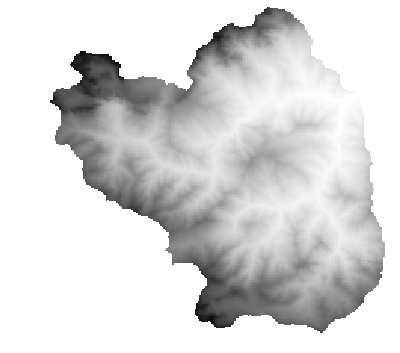

In [191]:
plt.figure(figsize=(6, 6))
plt.imshow(dem, extent=[XX[0], XX[-1], YY[0], YY[-1]])
plt.axis('equal')
plt.axis('off');

In [102]:
# definir sistemas de referencia de coordenadas
ETRS89_30N = Proj(init='epsg:25831')
WGS84_GC = Proj(init='epsg:4326')
SINUSOIDAL = Proj(projparams='+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

In [198]:
# esquina superior izquierda
Xl, Yt = transform(ETRS89_30N, SINUSOIDAL, XX[0], YY[-1])
# esquina inferior derecha
Xr, Yb = transform(ETRS89_30N, SINUSOIDAL, XX[-1], YY[0])

In [199]:
Xl, Xr

(92131.28517467232, 114992.59989741402)

In [103]:
extent= np.array([transform(ETRS89_30N, SINUSOIDAL, Xo, Yo),
                  transform(ETRS89_30N, SINUSOIDAL, Xf, Yf)])
extent

array([[  64415.23956116, 4763525.57172843],
       [ 127215.97897566, 4786505.87585479]])

In [180]:
Xo, Xf, Yo, Yf =  - extent[1,0], - extent[0,0], extent[1,0], extent[1,1]
extentDEM = [Xo, Xf, Yo, Yf]

In [181]:
extentDEM

[-127215.97897566078,
 -64415.239561158036,
 127215.97897566078,
 4786505.875854792]

In [188]:
YY

Float64Index([4763990.0, 4764090.0, 4764190.0, 4764290.0, 4764390.0, 4764490.0,
              4764590.0, 4764690.0, 4764790.0, 4764890.0,
              ...
              4784590.0, 4784690.0, 4784790.0, 4784890.0, 4784990.0, 4785090.0,
              4785190.0, 4785290.0, 4785390.0, 4785490.0],
             dtype='float64', length=216)

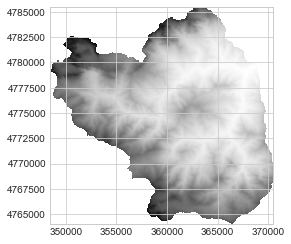

In [190]:
plt.imshow(dem, extent=[XX[0], XX[-1], YY[0], YY[-1]])#, extent=extentDEM)

#### MOD16A2

In [16]:
#rutaMODIS = 'F:/OneDrive - Universidad de Cantabria/Cartografia/MODIS/MOD16A2/'
rutaMODIS = 'C:/Users/jcr693/Documents/IH/MODIS/'
os.chdir(rutaMODIS)
files = os.listdir()

In [20]:
files

['MOD16A2.A2012129.h17v04.006.2017097024516.hdf']

In [17]:
file = 'MOD16A2.A2012129.h17v04.006.2017097024516.hdf'

In [18]:
# f = h5py.File(files[2], mode='r')

In [22]:
Dataset(file, 'r')

OSError: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: b'MOD16A2.A2012129.h17v04.006.2017097024516.hdf'

In [15]:
f = Dataset(file, format='hdf4')
print('Metadata for the dataset:')
print(f)

OSError: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: b'MOD16A2.A2012129.h17v04.006.2017097024516.hdf'

In [62]:
print('List of available variables (or key):')
print(f.variables.keys())
print('\nMetadata for "ET_500m" variable:')
print(f['ET_500m'])

List of available variables (or key):
odict_keys(['ET_500m', 'LE_500m', 'PET_500m', 'PLE_500m', 'ET_QC_500m'])

Metadata for "ET_500m" variable:
<class 'netCDF4._netCDF4.Variable'>
>i2 ET_500m(YDim:MOD_Grid_MOD16A2, XDim:MOD_Grid_MOD16A2)
    long_name: MODIS Gridded 500m 8-day Composite Evapotranspiration (ET)
    _FillValue: 32767
    valid_range: [-32767  32700]
    units: kg/m^2/8day
    scale_factor: 0.1
    scale_factor_err: 0.0
    add_offset: 0.0
    add_offset_err: 0.0
    calibrated_nt: 22
unlimited dimensions: 
current shape = (2400, 2400)
filling on


In [208]:
data = f['ET_500m'][:]
print(type(data))
print(data.shape)

<class 'numpy.ma.core.MaskedArray'>
(2400, 2400)


In [209]:
xDim, yDim = 2400, 2400
xo, yf = -1111950.519667, 5559752.598333
xf, yo = 0., 4447802.078667

In [210]:
TileGridID = 51017004
# primer dígito:
    # 3 - Lambert Azimuthal Equal-Area projection with projection center at the North Pole
    # 4 - Lambert Azimuthal Equal-Area projection with projection center at the South Pole
    # 5 - Sinusoidal projection
# segundo dígito:
    # 1 - full size tile
# dígitos 3-5: horizontal tile number (000-035)
# dígitos 6-8: vertical tile number (000-017)

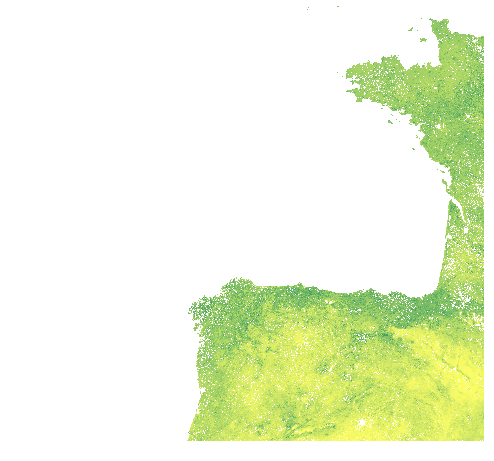

In [211]:
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='summer_r', extent=[xo, xf, yo, yf])
plt.axis('off');

In [224]:
xModis = np.linspace(xo, xf, xDim)
yModis = np.linspace(yf, yo, yDim)

In [225]:
oj = np.argmin(abs(Xl - xModis))
fj = np.argmin(abs(Xr - xModis))
oj, fj

(2399, 2399)

In [228]:
oi = np.argmin(abs(Yt - yModis))
fi = np.argmin(abs(Yb - yModis))
oi, fi

(1670, 1715)

In [168]:
extentMODIS = [xModis[oj], xModis[fj], yModis[oi], yModis[fi]]

In [172]:
extentDEM

[-127215.97897566078,
 -64415.239561158036,
 4786505.875854792,
 127215.97897566078]

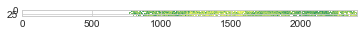

In [230]:
plt.imshow(data[oi:fi,:], cmap='summer_r')#, extent=extentMODIS)

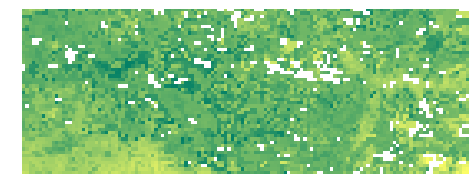

In [162]:
plt.figure(figsize=(8, 8))
plt.imshow(dem[::-1], extent=[Xo, Xf, Yo, Yf])
plt.imshow(data[oi:fi, oj:fj], cmap='summer_r')#, extent=[xModis[oj], xModis[fj], yModis[oi], yModis[oj]])
# plt.axis('equal')
plt.axis('off');